# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.257189e+01     1.318211e+01
 * time: 0.0033941268920898438
     1     5.999175e+01     1.045879e+01
 * time: 0.009781122207641602
     2     5.488066e+01     1.304513e+01
 * time: 0.024507999420166016
     3     3.912169e+01     8.405523e+00
 * time: 0.04490399360656738
     4     2.978784e+01     6.816258e+00
 * time: 0.06603717803955078
     5     2.624329e+01     6.035607e+00
 * time: 0.14987802505493164
     6     1.208515e+01     2.230497e+00
 * time: 0.167572021484375
     7     1.192162e+01     5.779757e+00
 * time: 0.17944002151489258
     8     1.060245e+01     3.387197e+00
 * time: 0.19416403770446777
     9     9.434609e+00     4.383353e+00
 * time: 0.2087230682373047
    10     7.845340e+00     2.530286e+00
 * time: 0.22328901290893555
    11     6.734473e+00     2.146401e+00
 * time: 0.23784303665161133
    12     6.297202e+00     2.537180e+00
 * time: 0.24962615966796875
    13     6.131105e+00     2.469868e+00
 * time

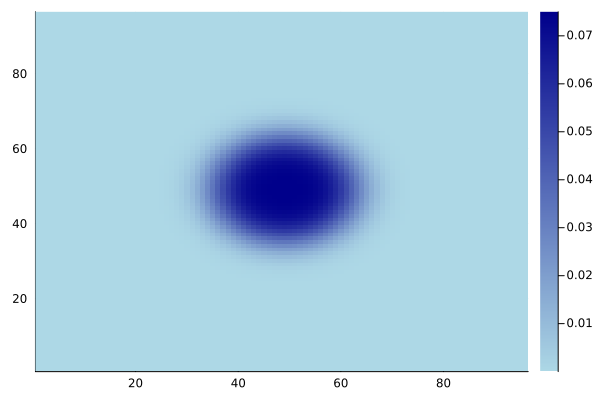

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)